# 1. 第一个分类算法

Hello, 这里是Tencent Cloud Studio的AI线上培训，我们将从开发者视角提供基本的AI算法模型从开发到部署的实践教程，并利用Cloud Studio的强大能力提供完善的AI开发环境，无需为工具的配置、数据集的处理、预训练模型的下载而烦恼。

让我们立刻开始！

首先我们来快速完成一个简单的预测(prediction)算法模型。在机器学习中，所谓的预测(prediction)，实际上是基于已有数据的分类统计模型上，对新数据进行特征处理后，判断其所属类别。我们可以用一小段Python代码演示如下：

In [26]:
from sklearn.linear_model import LogisticRegression
import pickle

model = LogisticRegression()

# 模拟一条分界线 y=ax+b, 
X = []
y = []
for i in range(-1000,1000):
    X.append([i])
    if i<=100:
        y.append([1])
    else:
        y.append([2])

model.fit(X, y)

result = model.predict([[4],[200],[-100]])
print('分类结果: ', result)

result = model.predict([[300],[400],[100],[-100]])
print('分类结果: ', result)

modelFilename = '../model/lesson1_1.p'

pickle.dump(model, open(modelFilename, 'wb'))
 

分类结果:  [1 2 1]
分类结果:  [2 2 1 1]
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
modelFilename = '../model/lesson1_1.p'
loaded_model = pickle.load(open(modelFilename, 'rb'))
result = model.predict([[1,400,500]])
print(result)

[1]


## 聚类算法演示：蓝色像素点聚类

consensus score: 1.000


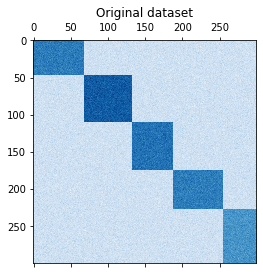

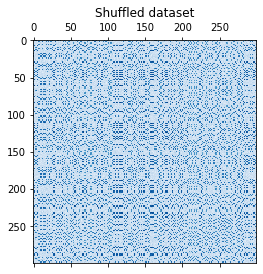

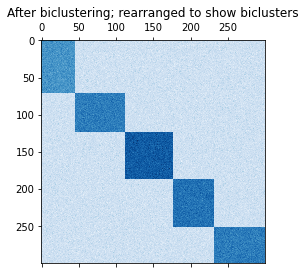

In [5]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

#plt.show()
plt.savefig("./templates/test1.jpg")

import io
import base64
my_stringIObytes = io.BytesIO()
plt.savefig(my_stringIObytes, format='jpg')
my_stringIObytes.seek(0)
my_base64_jpgData = base64.b64encode(my_stringIObytes.read())
jpgStr = my_base64_jpgData.decode("utf-8")

import requests
url = 'https://pdumhe-ahmwgf-5000.app.myide.io/image'
myobj = {'image_data': jpgStr}
x = requests.post(url, json = myobj)


## 图像分类类别展示（未训练）

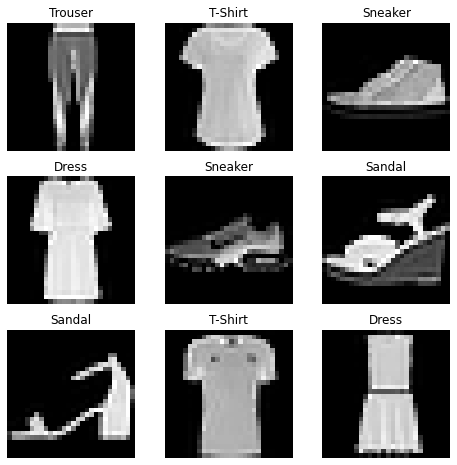

In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

import io
import base64
my_stringIObytes = io.BytesIO()
plt.savefig(my_stringIObytes, format='jpg')
my_stringIObytes.seek(0)
my_base64_jpgData = base64.b64encode(my_stringIObytes.read())
jpgStr = my_base64_jpgData.decode("utf-8")

import requests
url = 'https://pdumhe-ahmwgf-5000.app.myide.io/image'
myobj = {'image_data': jpgStr}
x = requests.post(url, json = myobj)

